# Importar librerías

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Poner en todas as columnas el punto describe

In [3]:
# Importar todas las bibliotecas necesarias para los ejercicios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import ttest_rel
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

# Importar base de datos

In [4]:
#df = pd.read_excel("/content/drive/MyDrive/Proyecto analitica /PublicHospitalDataset - Copy.xlsx")

In [5]:
#Se lee el archivo csv

df = pd.read_excel("PublicHospitalDataset - Copy.xlsx")

# Creamos una copia del dataframe
df2 = df.copy()
df2.head(5)

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
0,1,0,Yes,Private,Rural,190.14,36.5,never smoked,Female,73.0,0.0,3,1
1,0,0,Yes,Private,Urban,208.65,30.7,never smoked,Male,63.0,1302.0,0,1
2,0,0,Yes,Private,Rural,93.81,28.5,Unknown,Male,69.0,1887.0,1,1
3,0,1,Yes,Govt_job,Rural,103.68,25.0,never smoked,Male,82.0,2509.0,0,1
4,0,0,Yes,Private,Rural,137.30,31.7,formerly smoked,Male,63.0,3079.0,2,1


# Analizar base de datos

## Descripción General

### Tamaño de la base de datos

In [6]:
# Tamaño base de datos
df2.shape

(5112, 13)

### Tipos de datos

In [7]:
# Tipos de datos y nulos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5112 non-null   int64  
 1   Heart Disease      5112 non-null   object 
 2   Married            5112 non-null   object 
 3   Work               5112 non-null   object 
 4   Residence          5112 non-null   object 
 5   Avg_glucose_level  5112 non-null   float64
 6   Bmi                4911 non-null   float64
 7   Smoking            5112 non-null   object 
 8   Gender             5112 non-null   object 
 9   Age                5112 non-null   float64
 10  Income             5085 non-null   float64
 11  Children           5112 non-null   int64  
 12  Stroke             5112 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 519.3+ KB


### Datos nulos

**Cantidad de datos**

In [8]:
# Cantidad de datos nulos
df2.isnull().sum()

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Income                27
Children               0
Stroke                 0
dtype: int64

**Porcentaje de datos nulos**

In [9]:
# Calculamos el porcentaje de datos nulos de cada variable
percent = round(df2.isnull().mean()*100,2)
print(percent)

Hypertension         0.00
Heart Disease        0.00
Married              0.00
Work                 0.00
Residence            0.00
Avg_glucose_level    0.00
Bmi                  3.93
Smoking              0.00
Gender               0.00
Age                  0.00
Income               0.53
Children             0.00
Stroke               0.00
dtype: float64


### Datos en blanco

In [10]:
# Datos blancos
(df2 == '').sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Income               0
Children             0
Stroke               0
dtype: int64

## Descripción por columna categórica y análisis de valores nulos

### BMI

In [11]:
# Estadísticas básicas de BMI
df2["Bmi"].describe()

count     4911.000000
mean        61.449277
std       1140.430359
min         10.300000
25%         23.500000
50%         28.100000
75%         33.100000
max      40000.000000
Name: Bmi, dtype: float64

In [12]:
# Cambiamos el dato atipico de 40000 a 40, considerando que fue un typo
df2.loc[df2["Bmi"]>= 1000, "Bmi"] /= 1000

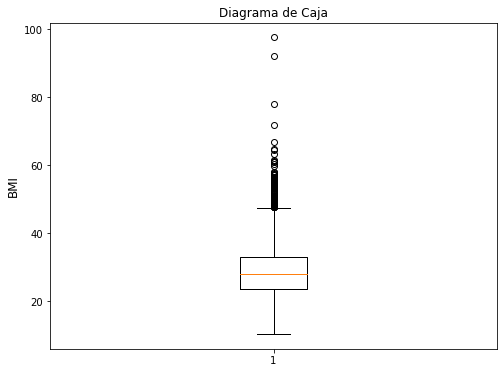

In [13]:
# Se determina tamaño de figura a crearse
plt.figure(figsize=(8, 6))

# Se realiza boxplot para ver distribución y valores atípicos de BMI
plt.boxplot(df2['Bmi'].dropna())
plt.title('Diagrama de Caja', fontsize = 12)
plt.ylabel('BMI', fontsize = 12)
plt.savefig('BMI1.pdf', format ="pdf", dpi=150)
plt.show()

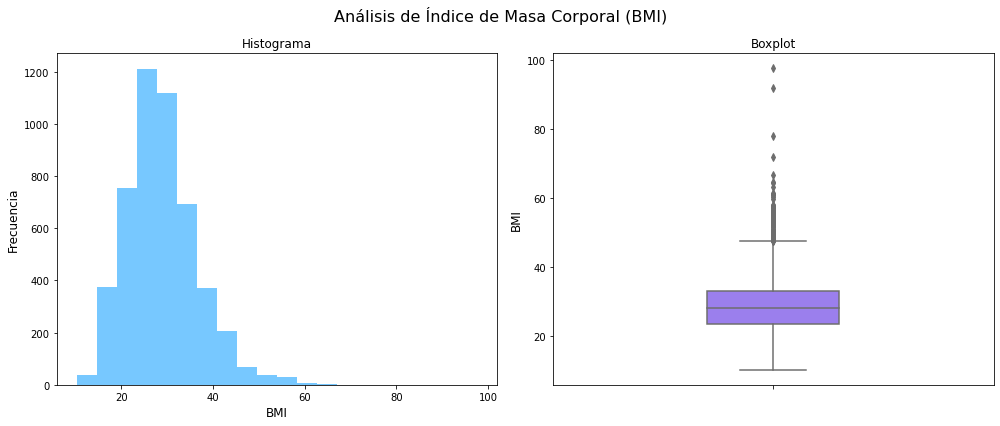

In [14]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn y se personaliza el gráfico
sns.histplot(data=df2, x='Bmi', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize = 12)
axes[0].set_xlabel('BMI', fontsize = 12)
axes[0].set_ylabel('Frecuencia', fontsize = 12)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Bmi', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot', fontsize = 12)
axes[1].set_ylabel('BMI', fontsize = 12)

# Título general central
plt.suptitle('Análisis de Índice de Masa Corporal (BMI)', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos y descargar
plt.savefig('BMI2.pdf', format ="pdf", dpi=150)
plt.show()

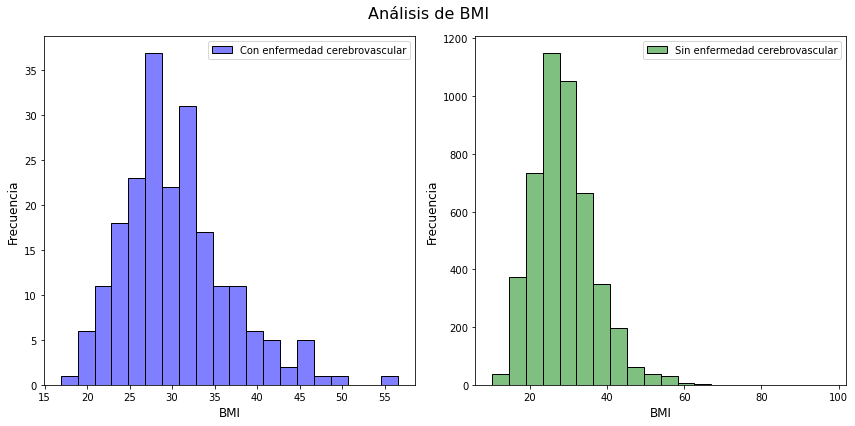

In [15]:
# Filtrar pacientes que sí tuvieron una enfermedad cerebrovascular
df_con_ecv = df2[df2['Stroke'] == 1]

# Filtrar pacientes que no tuvieron una enfermedad cerebrovascular
df_sin_ecv = df2[df2['Stroke'] == 0]

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Crear histograma para pacientes con enfermedad cerebrovascular
sns.histplot(data=df_con_ecv, x='Bmi', bins=20, color='blue', alpha=0.5, label='Con enfermedad cerebrovascular', ax=axes[0])
axes[0].set_xlabel('BMI', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].legend()
axes[0].grid(False)

# Crear histograma para pacientes sin enfermedad cerebrovascular
sns.histplot(data=df_sin_ecv, x='Bmi', bins=20, color='green', alpha=0.5, label='Sin enfermedad cerebrovascular', ax=axes[1])
axes[1].set_xlabel('BMI', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].legend()
axes[1].grid(False)

# Título general central
plt.suptitle('Análisis de BMI', fontsize=16)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.savefig('BMI_ataque.pdf', format ="pdf", dpi=150)
plt.show()

In [16]:
# Elimina todos los valores mayores a 54
df2 = df2[df2["Bmi"] <= 54]

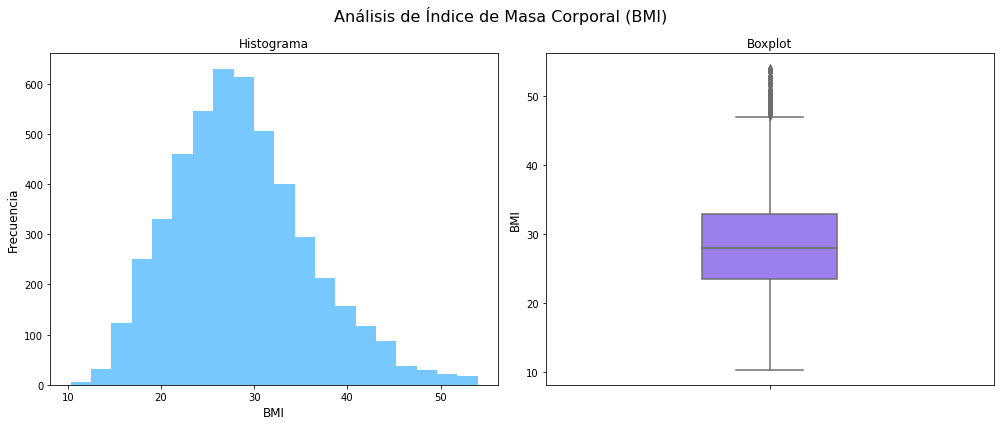

In [17]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn
sns.histplot(data=df2, x='Bmi', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize = 12)
axes[0].set_xlabel('BMI', fontsize = 12)
axes[0].set_ylabel('Frecuencia', fontsize = 12)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Bmi', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot', fontsize = 12)
axes[1].set_ylabel('BMI', fontsize = 12)

# Título general central
plt.suptitle('Análisis de Índice de Masa Corporal (BMI)', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.savefig('BMI3.pdf', format ="pdf", dpi=150)
plt.show()

In [18]:
# Calcular el valor de la mediana de la columna BMI
BMI_median = df2['Bmi'].median()

# Reemplazar valores nulos de BMI por la mediana
df2['Bmi'].fillna(BMI_median, inplace=True)

### Income

In [19]:
#Estadísticas generales de income
df2["Income"].describe()

count      4840.000000
mean     116538.611983
std       87211.769073
min           0.000000
25%       42783.500000
50%      101421.000000
75%      183250.250000
max      849615.000000
Name: Income, dtype: float64

In [20]:
#Cantidad de valores nulos
df2["Income"].isnull().sum()

27

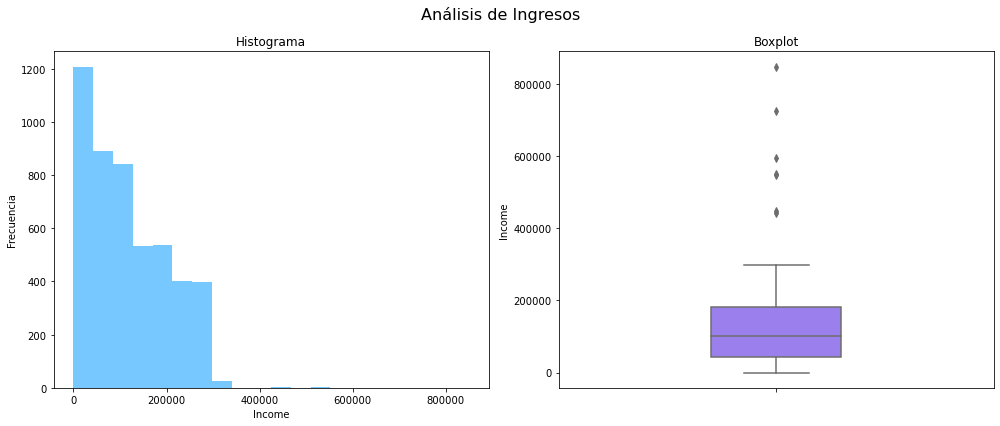

In [21]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn
sns.histplot(data=df2, x='Income', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frecuencia')

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Income', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot')
axes[1].set_ylabel('Income')

# Título general central
plt.suptitle('Análisis de Ingresos', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.savefig('Ingresos.pdf', format ="pdf", dpi=150)
plt.show()

In [22]:
# Calcular la mediana de la columna "Income"
income_median = df2['Income'].median()

# Llenar los valores nulos en la columna 'Income' con la mediana y guardar como tipo entero
df2['Income'].fillna(income_median, inplace=True)
df2["Income"] = df2["Income"].astype(int)

### Hipertensión

In [23]:
#Estadísticas básicas de la columna
df2["Hypertension"].describe()

count    4867.000000
mean        0.090405
std         0.286790
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Hypertension, dtype: float64

In [24]:
# Conteo de casos positivos y negativos de hipertensión y transformación a entero
df2['Hypertension'] = df2['Hypertension'].astype(np.uint64)
df["Hypertension"].value_counts()

0    4613
1     499
Name: Hypertension, dtype: int64

In [25]:
# Calculo de frecuencia como porcentajes
df2["Hypertension"].value_counts(normalize = True)*100

0    90.959523
1     9.040477
Name: Hypertension, dtype: float64

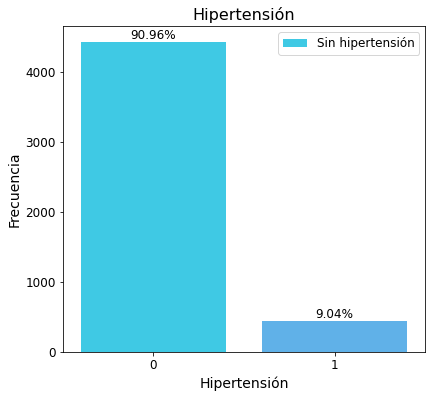

In [26]:
# Total en columnas
total = float(len(df2))
palette = sns.color_palette("cool")

# Figura y los ejes con un tamaño personalizado
fig, ax = plt.subplots(figsize=(6.5, 6))  # Ajusta el tamaño de la figura

# Gráfico de barras
sns.countplot(x='Hypertension', data=df2, palette=palette, ax=ax)

# Porcentajes de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom', fontsize=12)

# Título y etiquetas
plt.title('Hipertensión', fontsize=16)
plt.xlabel('Hipertensión', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalización de ejes y leyenda
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Sin hipertensión', 'Con hipertensión'], fontsize=12)

# Mostrar el gráfico
plt.savefig('Hipertension.pdf', format ="pdf", dpi=150)
plt.show()

### Heart Disease

In [27]:
#Estadísticas básicas de la columna
df2["Heart Disease"].describe()

count     4867
unique       3
top          0
freq      4624
Name: Heart Disease, dtype: int64

In [28]:
# Conteo de pacientes que han sufrido enfermedad cardíaca
df2["Heart Disease"].value_counts()

0     4624
1      242
No       1
Name: Heart Disease, dtype: int64

In [29]:
# Se cambia el No por "1", para que se queden todos los valores entre 0 y 1. Se cambia el tipo de dato a entero
df2['Heart Disease'] = df2['Heart Disease'].map({'No': 0}).fillna(df2['Heart Disease'])
df2['Heart Disease'] = df2['Heart Disease'].astype(np.uint64)
df2["Heart Disease"].value_counts()

0    4625
1     242
Name: Heart Disease, dtype: int64

In [30]:
# Frecuencia de casos de enfermedad cardíaca como porcentaje
df2["Heart Disease"].value_counts(normalize = True)*100

0    95.027738
1     4.972262
Name: Heart Disease, dtype: float64

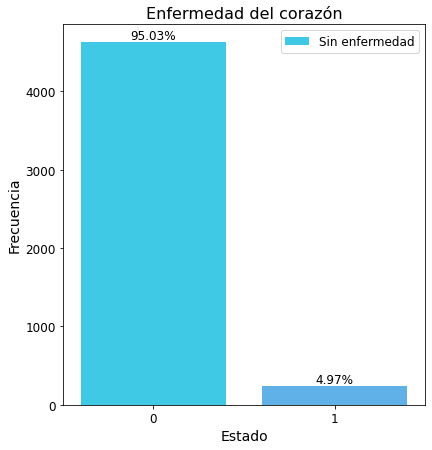

In [31]:
# Calcular total de casos para obtener porcentaje de cada caso
total = float(len(df2))
palette = sns.color_palette("cool")

# Crear la figura y los ejes con un tamaño personalizado
fig, ax = plt.subplots(figsize=(6.5, 7))  # Ajusta el tamaño de la figura
ax = sns.countplot(x='Heart Disease', data=df2, palette=palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom', fontsize = 12)

# Añadir título y etiquetas
plt.title('Enfermedad del corazón', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Sin enfermedad', 'Con enfermedad'], fontsize=12)

# Mostrar el gráfico
plt.savefig('Corazon.pdf', format ="pdf", dpi=150)
plt.show()

### Married

In [32]:
#Estadísticas básicas de la columna
df2["Married"].describe()

count     4867
unique       2
top        Yes
freq      3172
Name: Married, dtype: object

In [33]:
# Conteo de casos casados y no casados
df2["Married"].value_counts()

Yes    3172
No     1695
Name: Married, dtype: int64

In [34]:
# Se cambian los valores "Yes" a 1 y "No" a 0 para mantener formato
# Se cambia el tipo de dato a entero
df2["Married"].value_counts()
df2['Married'] = df2['Married'].map({'No': 0, 'Yes': 1}).fillna(df2['Married'])
df2['Married'] = df2['Married'].astype(np.uint64)
df2["Married"].value_counts()

1    3172
0    1695
Name: Married, dtype: int64

In [35]:
# Cáclulo de frecuencia como porcentaje
df2["Married"].value_counts(normalize = True)*100

1    65.173618
0    34.826382
Name: Married, dtype: float64

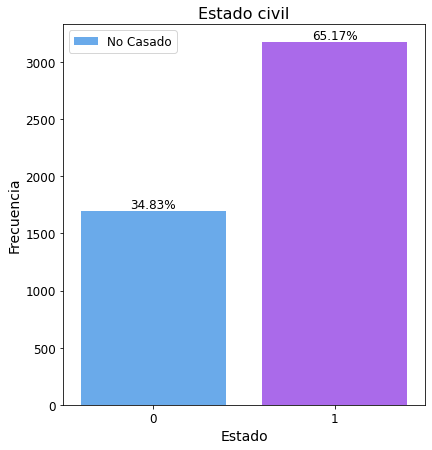

In [36]:
# Calcular el porcentaje de cada categoría
total = float(len(df2))
palette = sns.color_palette("cool", 2)
fig, ax = plt.subplots(figsize=(6.5, 7))
ax = sns.countplot(x='Married', data=df2, palette=palette)

# Poner el porcentaje sobre la barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom', fontsize = 12)

# Añadir título y etiquetas
plt.title('Estado civil', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['No Casado', 'Casado'], fontsize=12)

# Mostrar el gráfico
plt.savefig('Casado.pdf', format ="pdf", dpi=150)
plt.show()

### Work

In [37]:
#Estadísticas básicas de la columna
df2["Work"].describe()

count        4867
unique          9
top       Private
freq         2772
Name: Work, dtype: object

In [38]:
# Conteo de cada categoría de variable work
df2["Work"].value_counts()

Private          2772
Self-employed     767
children          672
Govt_job          626
Never_worked       22
sdfsdf              3
kñsdh-k             2
dsfsdf              2
sdsd-i              1
Name: Work, dtype: int64

In [39]:
# Añadir errores de categorías a una categoría llamada Inconsistente
# Se puso el nombre de la categoría igual que en el documento
df2['Work'] = df2['Work'].map({'Govt_job': 'Govt_jov', 'children': 'Children', 'kñsdh-k': 'Inconsistente', 'sdfsdf': 'Inconsistente', 'dsfsdf': 'Inconsistente', 'sdsd-i': 'Inconsistente'}).fillna(df2['Work'])

In [40]:
# Conteo de valores con cambios realizados
df2["Work"].value_counts()

Private          2772
Self-employed     767
Children          672
Govt_jov          626
Never_worked       22
Inconsistente       8
Name: Work, dtype: int64

In [41]:
# Frecuencia de valores de work como porcentaje
df2["Work"].value_counts(normalize = True)*100

Private          56.955003
Self-employed    15.759195
Children         13.807273
Govt_jov         12.862133
Never_worked      0.452024
Inconsistente     0.164372
Name: Work, dtype: float64

<Figure size 576x432 with 0 Axes>

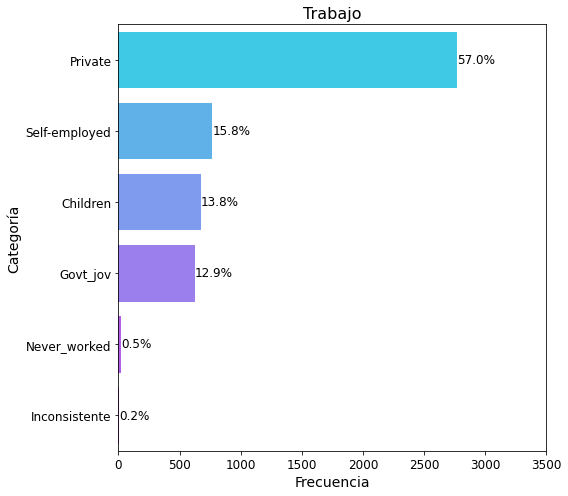

In [42]:
# Calcular la frecuencia de cada categoría
frecuencia_categoria = df2['Work'].value_counts().reset_index()
frecuencia_categoria.columns = ['Categoría', 'Frecuencia']
frecuencia_categoria = frecuencia_categoria.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
palette = sns.color_palette("cool")
fig, ax = plt.subplots(figsize=(8, 7))  # Ajusta el tamaño de la figura
ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)

# Añadir porcentaje sobre las barras
total_observaciones = len(df2)
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_width() / total_observaciones) # Calcular el porcentaje
    x = p.get_width()  # Posición x del texto
    y = p.get_y() + p.get_height() / 2  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=12, color='black')

plt.xlim(0, 3500)
# Añadir título y etiquetas
plt.title('Trabajo', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel("Categoría", fontsize = 14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Trabajo.pdf', format ="pdf", dpi=150)
plt.show()

In [43]:
# Eliminar los registros que contienen "Inconsistente" en la columna "work"
df2 = df2[df2['Work'] != 'Inconsistente']

### Residents

In [44]:
#Estadísticas básicas de la columna
df2["Residence"].describe()

count      4859
unique        2
top       Urban
freq       2466
Name: Residence, dtype: object

In [45]:
df2["Residence"].value_counts()

Urban    2466
Rural    2393
Name: Residence, dtype: int64

In [46]:
# Se cambian valores en las columnas por 0 y 1
# Se cambia el tipo de dato a entero
# Urban = 0, Rural = 1
df2['Residence'] = df2['Residence'].map({'Urban': 0, 'Rural': 1}).fillna(df2['Residence'])
df2['Residence'] = df2['Residence'].astype(np.uint64)

# Conteo de casos de residence
df2["Residence"].value_counts()

0    2466
1    2393
Name: Residence, dtype: int64

In [47]:
# Frecuencia de cada caso porcentual
df2["Residence"].value_counts(normalize = True)*100

0    50.751183
1    49.248817
Name: Residence, dtype: float64

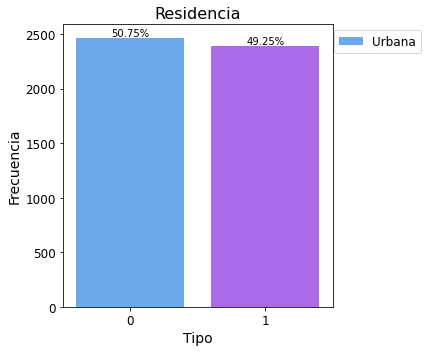

In [48]:
# Crear el gráfico
total = float(len(df2))
palette = sns.color_palette("cool",2)
fig, ax = plt.subplots(figsize=(6.5, 5))  # Ajusta el tamaño de la figura
ax = sns.countplot(x='Residence', data=df2, palette=palette)

# Porcentaje encima de la barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Residencia', fontsize=16)
plt.xlabel('Tipo', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1.35, 1), labels=['Urbana', 'Rural'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Residenca.pdf', format ="pdf", dpi=150)
plt.show()

### Smoking

In [49]:
#Estadísticas básicas de la columna
df2["Smoking"].describe()

count             4859
unique               5
top       never smoked
freq              1826
Name: Smoking, dtype: object

In [50]:
# Conteo de casos de la columna smoking
df2["Smoking"].value_counts()

never smoked       1826
Unknown            1473
formerly smoked     832
smokes              727
weed                  1
Name: Smoking, dtype: int64

In [51]:
# Columna Smoking
# Incluimos el dato weed en smokes, dado que solo hay un caso y si es fumador. Si tendriamos mas casos de weed, lo dejariamos como una categoria propia
df2['Smoking'] = df2['Smoking'].map({'weed': 'smokes'}).fillna(df2['Smoking'])

In [52]:
# Contar las veces que sale cada categoría
df2["Smoking"].value_counts()

never smoked       1826
Unknown            1473
formerly smoked     832
smokes              728
Name: Smoking, dtype: int64

In [53]:
# Frecuencia porcentual de casos de smoked
df2["Smoking"].value_counts(normalize = True)*100

never smoked       37.579749
Unknown            30.314880
formerly smoked    17.122865
smokes             14.982507
Name: Smoking, dtype: float64

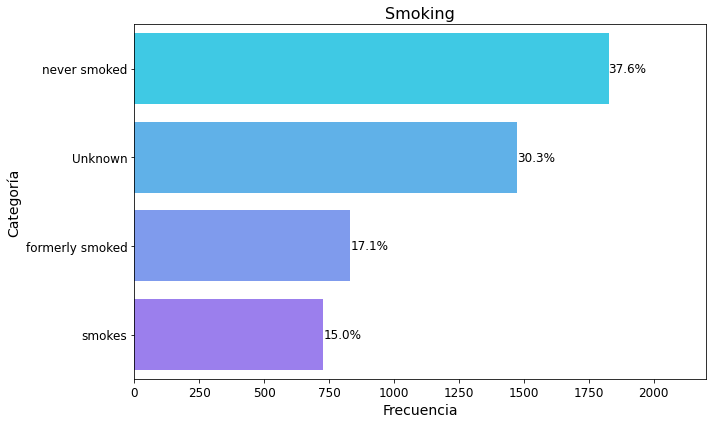

In [54]:
# Calcular la frecuencia de cada categoría
frecuencia_categoria = df2['Smoking'].value_counts().reset_index()
frecuencia_categoria.columns = ['Categoría', 'Frecuencia']
frecuencia_categoria = frecuencia_categoria.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
palette = sns.color_palette("cool")
ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)

# Añadir porcentaje sobre las barras
total_observaciones = len(df2)
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_width() / total_observaciones) # Calcular el porcentaje
    x = p.get_width()  # Posición x del texto
    y = p.get_y() + p.get_height() / 2  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=12, color='black')

plt.xlim(0, 2200)
# Añadir título y etiquetas
plt.title('Smoking', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Categoría', fontsize=14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Fuma.pdf', format ="pdf", dpi=150)
plt.show()

### Gender

In [55]:
#Estadísticas básicas de la columna
df2["Gender"].describe()

count       4859
unique         3
top       Female
freq        2860
Name: Gender, dtype: object

In [56]:
# Conteo de casos de la columna Gender
df2["Gender"].value_counts()

Female    2860
Male      1925
Other       74
Name: Gender, dtype: int64

In [57]:
# Frecuencia porcentual de casos de gender
df2["Gender"].value_counts(normalize = True)*100

Female    58.859848
Male      39.617205
Other      1.522947
Name: Gender, dtype: float64

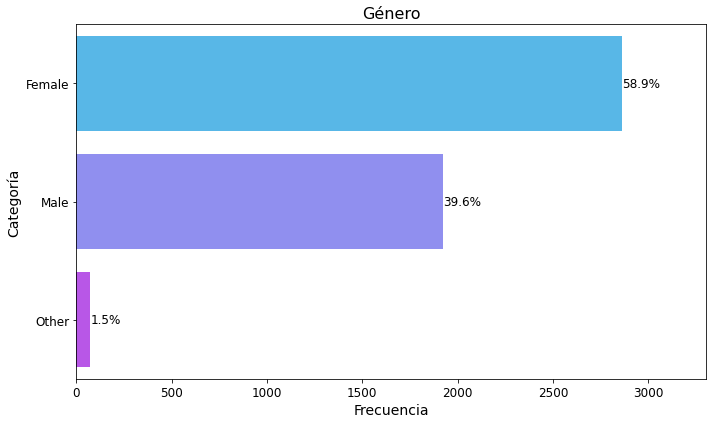

In [58]:
# Calcular la frecuencia de cada categoría
frecuencia_categoria = df2['Gender'].value_counts().reset_index()
frecuencia_categoria.columns = ['Categoría', 'Frecuencia']
frecuencia_categoria = frecuencia_categoria.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
palette = sns.color_palette("cool", 3)
ax = sns.barplot(x='Frecuencia', y='Categoría', data=frecuencia_categoria, palette=palette)

# Añadir porcentaje sobre las barras
total_observaciones = len(df2)
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_width() / total_observaciones) # Calcular el porcentaje
    x = p.get_width()  # Posición x del texto
    y = p.get_y() + p.get_height() / 2  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=12, color='black')

plt.xlim(0, 3300)
# Añadir título y etiquetas
plt.title('Género', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Categoría', fontsize=14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Genero.pdf', format ="pdf", dpi=150)
plt.show()

### Children

In [59]:
#Estadísticas básicas de la columna
df2["Children"].describe()

count    4859.000000
mean        1.251080
std         1.184823
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Children, dtype: float64

In [60]:
# Conteo de casos de columna Children
df2["Children"].value_counts()

0    1869
3    1023
2    1004
1     953
4       4
5       4
6       1
7       1
Name: Children, dtype: int64

In [61]:
# Frecuencia porcentual de casos de children
df2["Children"].value_counts(normalize = True)*100

0    38.464705
3    21.053715
2    20.662688
1    19.613089
4     0.082321
5     0.082321
6     0.020580
7     0.020580
Name: Children, dtype: float64

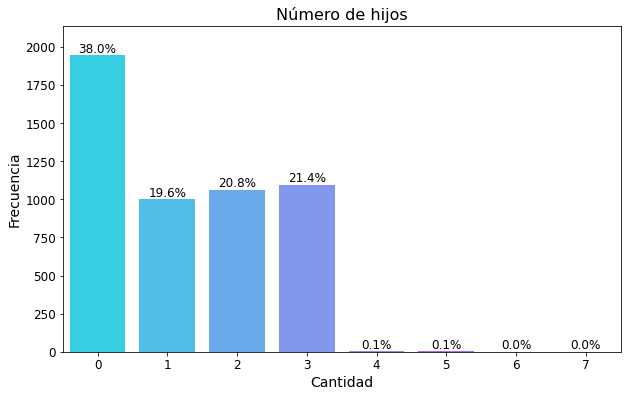

In [62]:
# Casos y frecuencia de cada caso de numero de hijos
num_hijos = [0, 1, 2, 3, 4, 5, 6, 7]  # Número de hijos
frecuencia = [1944, 1000, 1063, 1095, 4, 4, 1, 1]  # Frecuencia de cada número de hijos

# Calcular el total de observaciones
total_observaciones = sum(frecuencia)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=num_hijos, y=frecuencia, palette="cool")

# Añadir porcentaje sobre las barras
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_height() / total_observaciones) # Calcular el porcentaje
    x = p.get_x() + p.get_width() / 2  # Posición x del texto
    y = p.get_height()  # Posición y del texto
    ax.annotate(porcentaje, (x, y), ha='center', va='bottom', fontsize=12, color='black')

# Ajustar el límite en el eje y para que las barras más altas quepan completamente
plt.ylim(0, max(frecuencia) * 1.1)

# Añadir título y etiquetas
plt.title('Número de hijos', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ejes si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.savefig('Hijos.pdf', format ="pdf", dpi=150)
plt.show()

## Descripción de los datos numéricos

### Glucosa

In [63]:
# Estadísticas de columna glucosa
df2["Avg_glucose_level"].describe()

count    4859.000000
mean      105.163916
std        44.254869
min        55.120000
25%        77.065000
50%        91.650000
75%       113.370000
max       271.740000
Name: Avg_glucose_level, dtype: float64

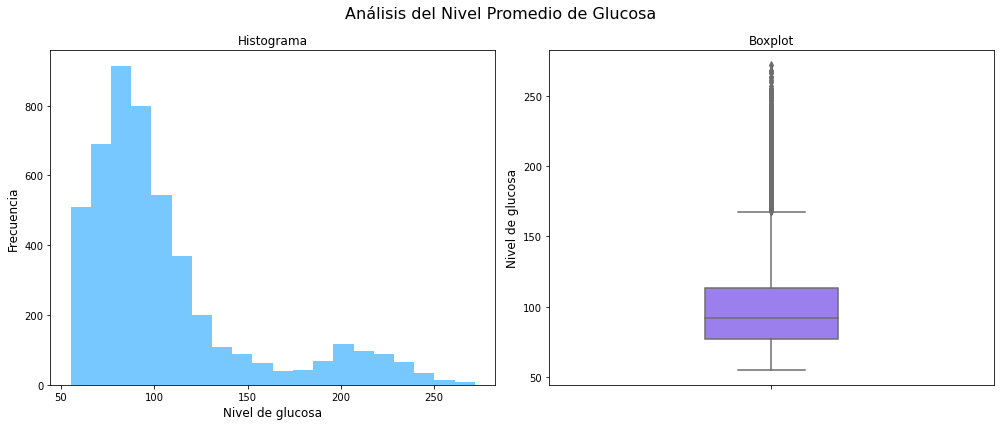

In [64]:
# Obtener la paleta "cool" de Seaborn
palette = sns.color_palette("cool")

# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con colores personalizados para las barras
sns.histplot(data=df2, x='Avg_glucose_level', bins=20, ax=axes[0], edgecolor='none', color=palette[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize=12)
axes[0].set_xlabel('Nivel de glucosa', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Avg_glucose_level', ax=axes[1], width=0.3, color=palette[3])
axes[1].set_title("Boxplot", fontsize = 12)
axes[1].set_ylabel('Nivel de glucosa', fontsize = 12)

# Título general central
plt.suptitle('Análisis del Nivel Promedio de Glucosa', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.savefig('Glucosa.pdf', format ="pdf", dpi=150)
plt.show()

### Edad

In [65]:
# Estadísticas importantes de columna Age
df2["Age"].describe()

count    4859.000000
mean       42.838675
std        22.616826
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: Age, dtype: float64

In [66]:
# Aproximar edades a entero más cercano
df2['Age'] = df2['Age'].round()
df2["Age"] = df2["Age"].astype(int)

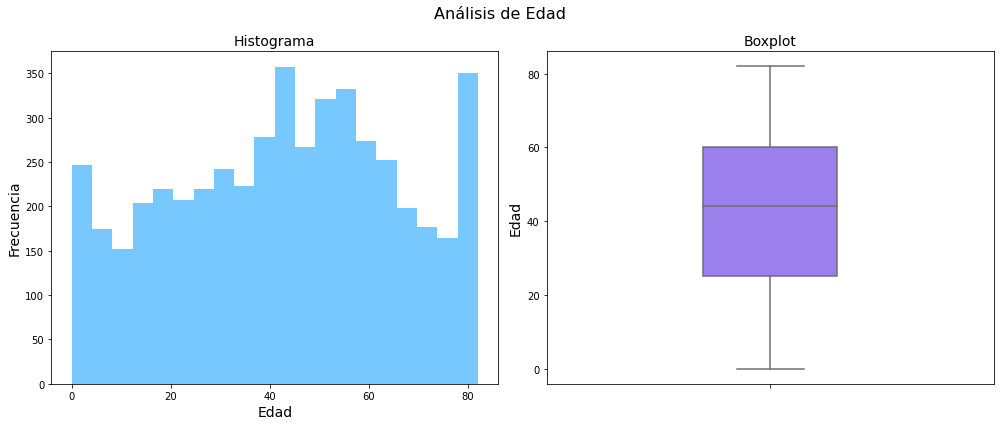

In [67]:
# Crear la figura y los ejes con una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma con Seaborn
sns.histplot(data=df2, x='Age', bins=20, edgecolor='none', ax=axes[0], color=sns.color_palette("cool")[1])  # Segundo color de la paleta "cool"
axes[0].set_title('Histograma', fontsize = 14)
axes[0].set_xlabel('Edad', fontsize = 14)
axes[0].set_ylabel('Frecuencia', fontsize = 14)

# Boxplot con Seaborn
sns.boxplot(data=df2, y='Age', ax=axes[1], color=sns.color_palette("cool")[3], width = 0.3)  # Segundo color de la paleta "cool"
axes[1].set_title('Boxplot', fontsize = 14)
axes[1].set_ylabel('Edad', fontsize =14)

# Título general central
plt.suptitle('Análisis de Edad', fontsize=16)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.savefig('Edad.pdf', format ="pdf", dpi=150)
plt.show()

### Análisis de la variable respuesta Stroke

In [68]:
# conteo de casos de stroke (aquí podemos observar que está desbalanceada)
df2["Stroke"].value_counts()

0    4652
1     207
Name: Stroke, dtype: int64

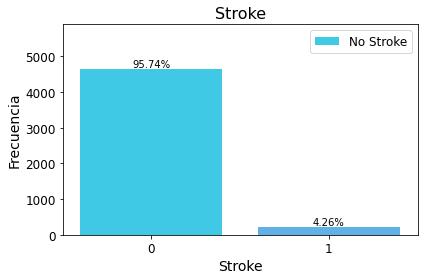

In [69]:
# Crear el gráfico
total = float(len(df2))
palette = sns.color_palette("cool")
ax = sns.countplot(x='Stroke', data=df2, palette=palette)

# Porcentajes encima de las columnas
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Stroke', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.ylim(0, 5900)
# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1, 1), labels=['No Stroke', 'Stroke'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Stroke.pdf', format ="pdf", dpi=150)
plt.show()

In [70]:
# Estadísticas de todo el dataframe hasta el momento
df2.describe()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Age,Income,Children,Stroke
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,0.090554,0.049599,0.651574,0.492488,105.163916,28.620251,42.838856,116199.424161,1.251080,0.042601
std,0.287003,0.217137,0.476521,0.499995,44.254869,7.262062,22.616574,86397.519913,1.184823,0.201977
min,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,77.065000,23.500000,25.000000,43393.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,91.650000,28.000000,44.000000,101421.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,113.370000,32.900000,60.000000,182709.000000,2.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,271.740000,54.000000,82.000000,849615.000000,7.000000,1.000000


In [71]:
# Datatype de todas las columnas del dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4859 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       4859 non-null   uint64 
 1   Heart Disease      4859 non-null   uint64 
 2   Married            4859 non-null   uint64 
 3   Work               4859 non-null   object 
 4   Residence          4859 non-null   uint64 
 5   Avg_glucose_level  4859 non-null   float64
 6   Bmi                4859 non-null   float64
 7   Smoking            4859 non-null   object 
 8   Gender             4859 non-null   object 
 9   Age                4859 non-null   int64  
 10  Income             4859 non-null   int64  
 11  Children           4859 non-null   int64  
 12  Stroke             4859 non-null   int64  
dtypes: float64(2), int64(4), object(3), uint64(4)
memory usage: 660.5+ KB


In [72]:
# Se comprueba que ya no hayan valores nulos
df2.isnull().sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Income               0
Children             0
Stroke               0
dtype: int64

In [73]:
# Se observa el tamaño del dataframe procesado
df2.shape

(4859, 13)

In [74]:
# Se comprueba que no hayan duplicados
df2.loc[df2.duplicated()]

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke


## Análisis adicionales

In [75]:
# Una edad coherente para trabajar
edad_min = 16
# Asegurando que 'Work' es tipo string para evitar errores
df2['Work'] = df2['Work'].astype(str)

# Cambiar el trabajo a 'Has Never Worked' para quienes tienen menos de 16 años y su trabajo actual es 'Children'
df2.loc[(df2['Age'] <= edad_min) & (df2['Work'] == 'Children'), 'Work'] = 'Never_worked'

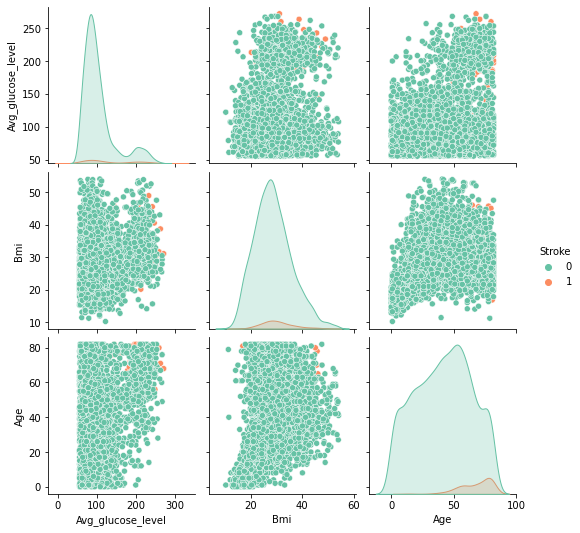

In [76]:
# Análisis entre nivel de glucosa, BMI, edad y si han sufrido un ataque cerebrovascular
g = sns.pairplot(df2, vars=["Avg_glucose_level", "Bmi", "Age"], hue = "Stroke", palette="Set2")
# Cambiar el color del fondo
g.fig.set_facecolor('white')
plt.savefig('Matriz.pdf', format ="pdf", dpi=200)
# Mostrar la imagen
plt.show()

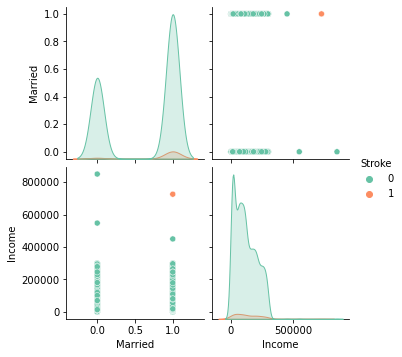

In [77]:
# Análisis entre categorías married, income y stroke
g = sns.pairplot(df2, vars=["Married", "Income"], hue = "Stroke", palette="Set2")
# Cambiar el color del fondo
g.fig.set_facecolor('white')
plt.savefig('Matriz2.pdf', format ="pdf", dpi=200)
# Mostrar la imagen
plt.show()

## Análisis de correlación

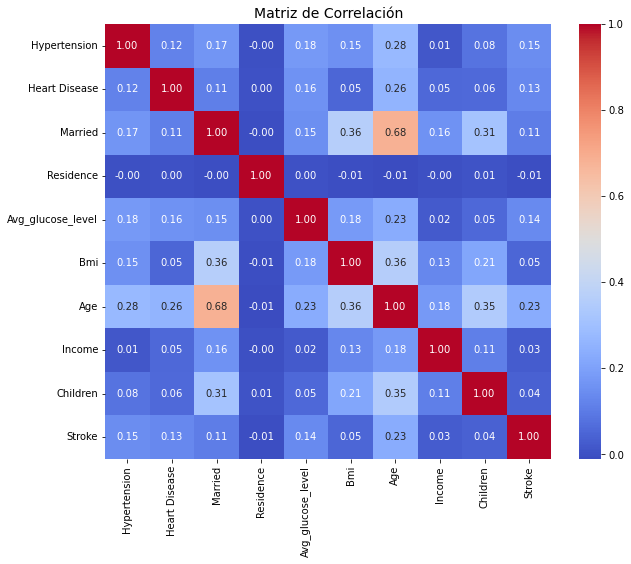

In [78]:
# Análisis de correlación entre variables numéricas
correlation_matrix = df2.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación", fontsize=14)

# Ajustar los márgenes de la figura para evitar recortes
plt.margins(0.1)

# Cambiar el color de fondo de toda la figura
plt.gcf().set_facecolor('white')

# Guardar la imagen con fondo blanco y evitando recortes
plt.savefig('Matriz de Correlacion.pdf', format ="pdf", dpi=150, bbox_inches='tight')

# Mostrar la imagen
plt.show()

## Transformar a variables dummies

In [79]:
# Selección de variables predictivas
predictors = ['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Income',
       'Children','Stroke' ]

# Convierto variables categoricas con más de dos categorías en dummies binarias
df3 = pd.get_dummies(df2[predictors], drop_first=True) # Se elimina primer caso para evitar colinealidad

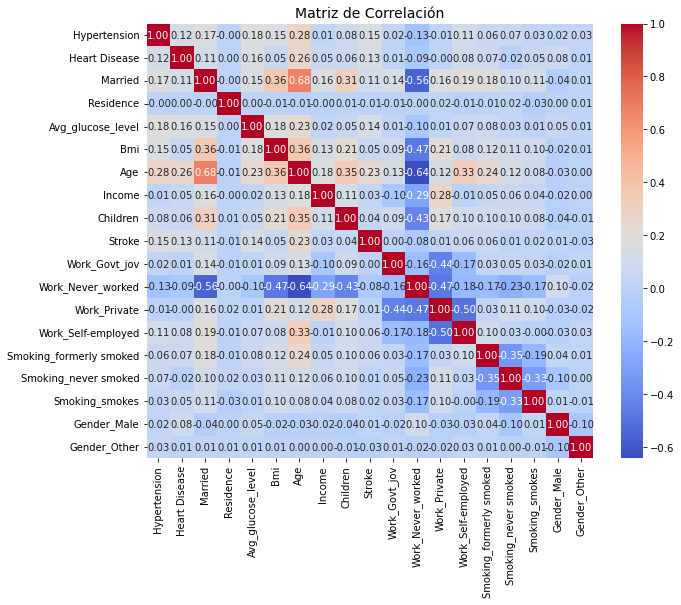

In [80]:
# Análisis de correlación entre variables numéricas
correlation_matrix = df3.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación", fontsize=14)

# Ajustar los márgenes de la figura para evitar recortes
plt.margins(0.1)

# Cambiar el color de fondo de toda la figura
plt.gcf().set_facecolor('white')

# Guardar la imagen con fondo blanco y evitando recortes
plt.savefig('Matriz de Correlacion.pdf', format ="pdf", dpi=150, bbox_inches='tight')

# Mostrar la imagen
plt.show()

In [81]:
# Base de datos después de todo el preprocesamiento
df3

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Age,Income,Children,Stroke,Work_Govt_jov,Work_Never_worked,Work_Private,Work_Self-employed,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Gender_Male,Gender_Other
0,1,0,1,1,190.14,36.5,73,0,3,1,0,0,1,0,0,1,0,0,0
1,0,0,1,0,208.65,30.7,63,1302,0,1,0,0,1,0,0,1,0,1,0
2,0,0,1,1,93.81,28.5,69,1887,1,1,0,0,1,0,0,0,0,1,0
3,0,1,1,1,103.68,25.0,82,2509,0,1,1,0,0,0,0,1,0,1,0
4,0,0,1,1,137.30,31.7,63,3079,2,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,1,1,82.99,30.6,35,37325,2,0,0,0,0,1,0,1,0,0,0
5108,0,0,1,1,166.29,25.6,51,56478,0,0,0,0,1,0,1,0,0,1,0
5109,0,0,1,0,85.28,26.2,44,77772,0,0,1,0,0,0,0,0,0,0,0
5110,1,0,1,0,90.51,31.0,33,18883,3,0,0,0,0,0,1,0,0,0,0


# Balancear bases de datos

Análisis conceptual, se explica en la presentación

# Dividir base de datos

In [82]:
# Dividir en entrenamiento y temporal (este último será dividido en validación y prueba)
df3_entrenamiento, df3_temporal = train_test_split(df3, test_size=0.3, random_state=42)

# Dividir el conjunto temporal en validación y prueba
df3_validación, df3_prueba = train_test_split(df3_temporal, test_size=(1/3), random_state=42)

In [83]:
# verificacion del modelo
print(f"Entrenamiento: {len(df3_entrenamiento)}")
print(f"Validación: {len(df3_validación)}")
print(f"Prueba: {len(df3_prueba)}")

Entrenamiento: 3401
Validación: 972
Prueba: 486


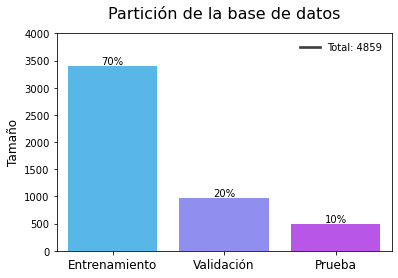

In [84]:
# Crear el gráfico
total = float(len(df2))

# Crear un DataFrame con los nombres de los tipos de set y su cantidad
df5 = pd.DataFrame({
    'Tipo de set': ['Entrenamiento', 'Validación', 'Prueba'],
    'Tamaño': [len(df3_entrenamiento), len(df3_validación), len(df3_prueba)]
})

# Crear el gráfico de barras apiladas usando Seaborn
ax = sns.barplot(data=df5, x='Tipo de set', y='Tamaño', palette='cool')

# Porcentajes encima de las columnas
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{}%'.format(round((height / total) * 100)),
            ha='center', va='bottom')

plt.ylim(0,4000)

# Mostrar el total en la parte superior derecha como leyenda
plt.legend(['Total: {}'.format(int(total))], loc='upper right', frameon=False)

# Modificar el tamaño de la fuente en el eje x
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Añadir etiquetas
plt.xlabel('', fontsize=12)
plt.ylabel('Tamaño', fontsize=12)
plt.title('Partición de la base de datos', fontsize=16, pad=15)

# Guardar el gráfico como PDF
plt.savefig('Partición.pdf', format='pdf')

# Mostrar el gráfico
plt.show()

In [85]:
# Guardamos el set de validación como variable
x_validacion = df3_validación.drop('Stroke', axis=1)

y_validacion = df3_validación['Stroke']

In [86]:
# Guardamos set de prueba como variable
x_prueba = df3_prueba.drop('Stroke', axis=1)

y_prueba = df3_prueba['Stroke']

# Análisis Balance de datos

## Over Sample

In [87]:
# Se selecciona las variables predictivas y variabled de respuesta
X_train = df3_entrenamiento.drop('Stroke', axis=1)
y_train = df3_entrenamiento['Stroke']

# Se inicializa el algoritmo SMOTE para realizar oversample
smote = SMOTE()

# Se ajusta y entrena con algoritmo
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

# Se convierte la nueva base de datos de nuevo a dataframe
df_oversample = pd.DataFrame(X_oversample, columns=X_train.columns)
df_oversample['Stroke'] = y_oversample


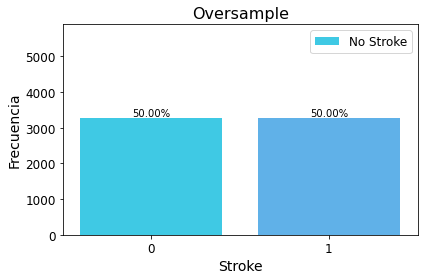

In [88]:
# Se comprueba que la base de datos si esté balanceada
# Calcular el porcentaje de cada categoría y crear gráfico
total = float(len(df_oversample))
palette = sns.color_palette("cool")
ax = sns.countplot(x='Stroke', data=df_oversample, palette=palette)

# Porcentaje encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Oversample', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.ylim(0, 5900)
# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1, 1), labels=['No Stroke', 'Stroke'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Stroke_Over.pdf', format ="pdf", dpi=150)
plt.show()

In [89]:
# Guardamos como variables predictivas y de respuesta de entrenamiento para hacer el fit
x_entrenamiento = df_oversample.drop('Stroke', axis=1)

y_entrenamiento = df_oversample['Stroke']

In [90]:
# Función para normalizar variables
scaler = StandardScaler()

# Se realiza una regresión logística en la base de datos balanceada
# Creamos nuestras "X" (variables predictivas) y nuestra "Y" (variable de respuesta) de entrenamiento
X_train = scaler.fit_transform(df_oversample.drop('Stroke', axis=1))
y_train = df_oversample['Stroke']

# Creamos una constante que sea intercepción con el eje "Y"
X_train = sm.add_constant(X_train)

# Se inicializa y se ajusta la regresión logística
logit_model = sm.Logit(y_train, X_train)
logit_results = logit_model.fit()#method='bfgs', maxiter=100)

# Resultados
print(logit_results.summary())

         Current function value: 0.233021
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                 6530
Model:                          Logit   Df Residuals:                     6511
Method:                           MLE   Df Model:                           18
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.6638
Time:                        08:22:50   Log-Likelihood:                -1521.6
converged:                      False   LL-Null:                       -4526.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4325    1.3e+04      0.000      1.000   -2.54e+04    2.54e+04
x1            -0.0634      0.039     -1.611      0.107      -0.14

/Users/andrescardenas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [91]:
# Predecir las clases usando el modelo de regresión logística
y_pred = logit_results.predict(X_train)

# Convertir probabilidades a clases binarias
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_train, y_pred_binary)
precision = precision_score(y_train, y_pred_binary)
recall = recall_score(y_train, y_pred_binary)
f1 = f1_score(y_train, y_pred_binary)
roc_auc = roc_auc_score(y_train, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8934150076569678
Precision: 0.900780031201248
Recall: 0.8842266462480858
F1 Score: 0.8924265842349305
ROC AUC Score: 0.9665365412080891


In [92]:
# Observamos tamaño de set de entrenamiento
df_oversample.shape

(6530, 19)

## Under Sample

In [93]:
# Se selecciona las variables predictivas y variabled de respuesta
X_train = df3_entrenamiento.drop('Stroke', axis=1)
y_train = df3_entrenamiento['Stroke']

# Se inicializa el algortimo de balanceo
rus = RandomUnderSampler()

# Se aplica y ajusta el algoritmo
X_undersample, y_undersample = rus.fit_resample(X_train, y_train)

# Se convierte los resultados de vuelta a un dataframe
df_undersample = pd.DataFrame(X_undersample, columns=X_train.columns)
df_undersample['Stroke'] = y_undersample

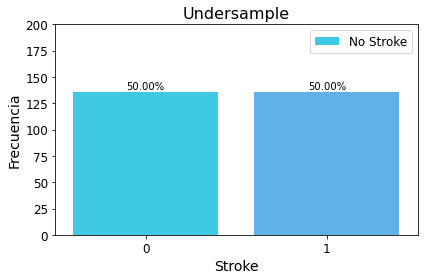

In [94]:
# Se comprueba que los datos estén balanceados
# Calcular el porcentaje de cada categoría y crear gráfico
total = float(len(df_undersample))
palette = sns.color_palette("cool")
ax = sns.countplot(x='Stroke', data=df_undersample, palette=palette)

# Porcentaje encima de las columnas
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, '{:.2f}%'.format((height / total) * 100),
            ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Undersample', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.ylim(0, 200)
# Personalizar los ejes y la leyenda si es necesario
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mover la leyenda a una ubicación adecuada
plt.legend(fontsize=12, title_fontsize='14', loc='upper right', bbox_to_anchor=(1, 1), labels=['No Stroke', 'Stroke'])

# Ajustar el diseño para que la leyenda no se solape con el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Stroke_Under.pdf', format ="pdf", dpi=150)
plt.show()

In [95]:
# Función para normalizar variables
scaler = StandardScaler()

# Creamos nuestras "X" (variables predictivas) y nuestra "Y" (variable de respuesta) de entrenamiento
#X_train = df_undersample.drop('Stroke', axis=1)
X_train = scaler.fit_transform(df_undersample.drop('Stroke', axis=1))
y_train = df_undersample['Stroke']

# Creamos una constante que sea intercepción con el eje "Y"
X_train = sm.add_constant(X_train)

# Se inicializa y se ajusta la regresión logística
logit_model = sm.Logit(y_train, X_train)
logit_results = logit_model.fit()

# Resultados
print(logit_results.summary())

         Current function value: 0.447652
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                  272
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                           17
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.3542
Time:                        08:22:51   Log-Likelihood:                -121.76
converged:                      False   LL-Null:                       -188.54
Covariance Type:            nonrobust   LLR p-value:                 3.876e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6164        nan        nan        nan         nan         nan
x1             0.3618      0.173      2.085      0.037       0.02

/Users/andrescardenas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
# Predecir las clases usando el modelo de regresión logística
y_pred = logit_results.predict(X_train)

# Convertir probabilidades a clases binarias
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_train, y_pred_binary)
precision = precision_score(y_train, y_pred_binary)
recall = recall_score(y_train, y_pred_binary)
f1 = f1_score(y_train, y_pred_binary)
roc_auc = roc_auc_score(y_train, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7904411764705882
Precision: 0.7615894039735099
Recall: 0.8455882352941176
F1 Score: 0.8013937282229965
ROC AUC Score: 0.8677551903114187


In [97]:
# Tamaño de set de entrenamiento con undersample
df_undersample.shape

(272, 19)

## Prueba estadística

In [98]:
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, precision_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Supongamos que ya tienes tus datos X y y

scaler = StandardScaler()

X_train = df3_entrenamiento.drop('Stroke', axis=1)
y_train = df3_entrenamiento['Stroke']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalizar las variables predictivas
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Crear el pipeline con SMOTE y el modelo de regresión logística para oversampling
pipeline_oversampled = make_pipeline(SMOTE(random_state=42), LogisticRegression())

# Definir la métrica de evaluación como la precisión
scoring = make_scorer(precision_score)

# Realizar validación cruzada para obtener la precisión del modelo con oversampling
precisions_oversampled = cross_val_score(pipeline_oversampled, X_train, y_train, cv=5, scoring=scoring)

print("Precisión del modelo con oversampling (validación cruzada):", precisions_oversampled)

# Crear el pipeline con RandomUnderSampler y el modelo de regresión logística para undersampling
pipeline_undersampled = make_pipeline(RandomUnderSampler(random_state=42), LogisticRegression())

# Realizar validación cruzada para obtener la precisión del modelo con undersampling
precisions_undersampled = cross_val_score(pipeline_undersampled, X_train, y_train, cv=5, scoring=scoring)

print("Precisión del modelo con undersampling (validación cruzada):", precisions_undersampled)

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(precisions_oversampled, precisions_undersampled)

# Imprimir los resultados
print("t-statistic:", t_stat)
print("p-value:", p_value)

Precisión del modelo con oversampling (validación cruzada): [0.12592593 0.10062893 0.11347518 0.12318841 0.10365854]
Precisión del modelo con undersampling (validación cruzada): [0.0955414  0.08791209 0.10344828 0.0962963  0.09550562]
t-statistic: 3.1375412220390344
p-value: 0.01385657042484608


## Selección método de balance

In [99]:
# Se crean csv con los dataframes de undersample y oversample
df_undersample.to_csv('undersample.csv', index=False)
df_oversample.to_csv('oversample.csv', index=False)

# Entrenamiento Algoritmos

## Algoritmo 1: Ensamble

In [100]:
# Se separan las variables predictivas (features) del dataframe 'df_oversample', excluyendo la columna 'Stroke'.
x_entrenamiento = df_oversample.drop('Stroke', axis=1)

# Se selecciona solo la columna 'Stroke' del dataframe 'df_oversample' para usarla como variable de respuesta (target).
y_entrenamiento = df_oversample['Stroke']


In [101]:
# Se crea una instancia de la clase DecisionTreeClassifier, que representa un clasificador basado en árboles de decisión.
dtc = DecisionTreeClassifier()

# Se crea una instancia de BaggingClassifier. Este clasificador utilizará el árbol de decisión anterior como el estimador base.
# Se configura para usar 50 árboles de decisión y permite el muestreo con reemplazo (bootstrap=True).
bag_model = BaggingClassifier(estimator=dtc, n_estimators=50, bootstrap=True)

# Entrena el modelo de Bagging con el conjunto de datos de entrenamiento. Usa las variables predictivas 'x_entrenamiento'
# y la variable objetivo 'y_entrenamiento' para aprender a clasificar.
bag_model.fit(x_entrenamiento, y_entrenamiento)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [102]:
# Utiliza el modelo de Bagging para hacer predicciones sobre el mismo conjunto de datos de entrenamiento.
yentren_pred = bag_model.predict(x_entrenamiento)

# Calcula la precisión del modelo comparando las predicciones con las verdaderas etiquetas del conjunto de entrenamiento.
accuracy = accuracy_score(y_entrenamiento, yentren_pred)
print("Precisión:", accuracy)

# Imprime el reporte de clasificación, que incluye varias métricas como precisión, recall, f1-score para cada clase.
print("Reporte de Clasificación:")
print(classification_report(y_entrenamiento, yentren_pred))

# Imprime la matriz de confusión, que muestra de manera detallada el desempeño del modelo,
# comparando las etiquetas predichas con las verdaderas etiquetas.
print("Matriz de Confusión:")
print(confusion_matrix(y_entrenamiento, yentren_pred))

Precisión: 0.9998468606431853
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3265
           1       1.00      1.00      1.00      3265

    accuracy                           1.00      6530
   macro avg       1.00      1.00      1.00      6530
weighted avg       1.00      1.00      1.00      6530

Matriz de Confusión:
[[3265    0]
 [   1 3264]]


In [103]:
# Realiza predicciones sobre el conjunto de validación utilizando el modelo de Bagging previamente entrenado.
yvalid_pred = bag_model.predict(x_validacion)

# Calcula y muestra la precisión del modelo al comparar las predicciones con las etiquetas reales del conjunto de validación.
accuracy = accuracy_score(y_validacion, yvalid_pred)
print("Precisión:", accuracy)

# Imprime el reporte de clasificación, que incluye métricas detalladas como precisión, recall y f1-score por clase.
print("Reporte de Clasificación:")
print(classification_report(y_validacion, yvalid_pred))

# Imprime la matriz de confusión, que ofrece una vista detallada de las predicciones correctas e incorrectas del modelo.
print("Matriz de Confusión:")
print(confusion_matrix(y_validacion, yvalid_pred))

Precisión: 0.9238683127572016
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       925
           1       0.09      0.06      0.07        47

    accuracy                           0.92       972
   macro avg       0.52      0.52      0.52       972
weighted avg       0.91      0.92      0.92       972

Matriz de Confusión:
[[895  30]
 [ 44   3]]


## Hiperparámetros

In [104]:
# Crea un arreglo que comienza en 1, termina antes de 250, incrementando en 5 en cada paso.
param_range = np.arange(1, 250, 5)

In [105]:
# Calculan las puntuaciones de validación para diferentes valores del parámetro 'n_estimators' del BaggingClassifier.
# Conjunto de datos de validación ('x_validacion', 'y_validacion') y  evalúa el rendimiento con la métrica de 'accuracy'.
# 'cv = 5' usa validación cruzada de 5 particiones.
# 'n_jobs = -1' permite usar todos los procesadores disponibles para la evaluación
train_scores, test_scores = validation_curve(BaggingClassifier(), x_validacion, y_validacion, param_name="n_estimators",
                                            param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)


In [106]:
# Calcula la media de las puntuaciones de entrenamiento para cada valor del parámetro evaluado.
validation_mean = np.mean(train_scores, axis=1)

# Calcula la desviación estándar de las puntuaciones de entrenamiento para cada valor del parámetro evaluado.
validation_std = np.std(train_scores, axis=1)

In [107]:
# Calcula la media de las puntuaciones de prueba para cada valor del parámetro evaluado durante la validación cruzada.
test_mean = np.mean(test_scores, axis = 1)

# Calcula la desviación estándar de las puntuaciones de prueba, ofreciendo una medida de la variabilidad de las puntuaciones alrededor de su media para cada valor del parámetro.
test_std = np.std(test_scores, axis=1)

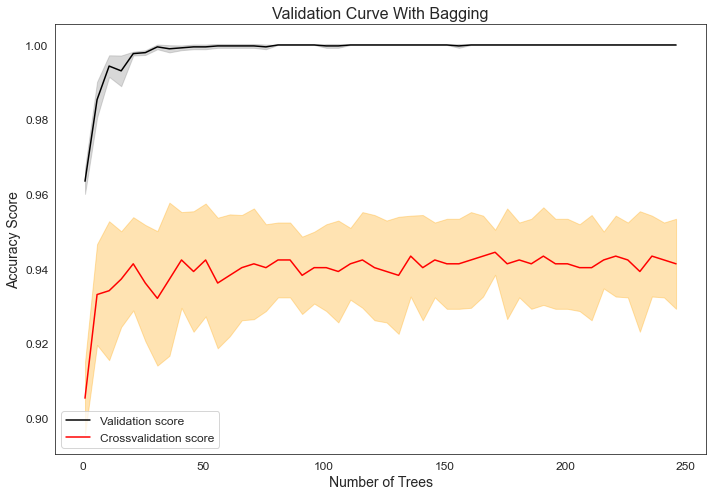

In [108]:
# Establecer el estilo de Seaborn en "white" para el fondo de los gráficos.
sns.set_style("white")

# Crear una nueva figura y ejes con un tamaño específico de 10x7 pulgadas.
plt.figure(figsize=(10, 7))

# Traza los datos de la media de las puntuaciones de validación contra el rango de parámetros, usando líneas negras.
sns.lineplot(x=param_range, y=validation_mean, label="Validation score", color="black")

# Traza los datos de la media de las puntuaciones de prueba (cross-validation) contra el rango de parámetros, usando líneas rojas.
sns.lineplot(x=param_range, y=test_mean, label="Crossvalidation score", color="red")

# Traza las bandas de precisión (intervalos de confianza) alrededor de las medias de las puntuaciones de validación
plt.fill_between(param_range, validation_mean - validation_std, validation_mean + validation_std, color="gray", alpha=0.3)

# Traza las bandas de precisión.
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.3)

# Configura etiquetas y título del gráfico con tamaños de fuente específicos.
plt.title("Validation Curve With Bagging", fontsize=16)
plt.xlabel("Number of Trees", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)

# Ajusta el tamaño de las marcas de los ejes para mejorar la legibilidad.
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajusta el diseño y la ubicación para evitar superposiciones.
plt.tight_layout()

# Muestra la leyenda en la ubicación especificada
plt.legend(loc="best", fontsize=12)

# Guardar el gráfico como una imagen en el disco o computadora
plt.savefig('Validacion.png', dpi=150, bbox_inches='tight', facecolor='white')

# Mostrar el gráfico generado.
plt.show()


## Evaluar

In [109]:
# Realizar predicciones en el conjunto de prueba usando el modelo de bagging previamente entrenado.
ytest_pred = bag_model.predict(x_prueba)

# Calcula la precisión del modelo comparando las predicciones (ytest_pred) con los valores reales (y_prueba).
accuracy = accuracy_score(y_prueba, ytest_pred)

#Imprimo la precision
print("Precisión:", accuracy)

# Muestra el reporte de clasificación, que incluye varias métricas de evaluación como la precisión, recall, f1-score para cada clase.
print("Reporte de Clasificación:")
print(classification_report(y_prueba, ytest_pred))

# Muestra la matriz de confusión, una tabla que permite la visualización del desempeño del algoritmo de clasificación.
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, ytest_pred))

Precisión: 0.9197530864197531
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       462
           1       0.14      0.12      0.13        24

    accuracy                           0.92       486
   macro avg       0.55      0.54      0.55       486
weighted avg       0.91      0.92      0.92       486

Matriz de Confusión:
[[444  18]
 [ 21   3]]


## Algoritmo 2

In [110]:
param_dist = {
    'n_estimators': randint(100, 500),  # Árboles en el bosque. Se buscan valores entre 100 y 500.
    'max_depth': randint(3, 20),        # Valores posibles entre 3 y 20.
    'min_samples_split': randint(2, 11),# Número mínimo de muestras requeridas para dividir un nodo interno entre 2 y 11.
    'min_samples_leaf': randint(1, 11), # Número mínimo de muestras requeridas en un nodo hoja entre 1 y 11.
    'bootstrap': [True, False]          # Método de selección de muestras para entrenar cada árbole
}

# Instancia del clasificador de bosque aleatorio
rf = RandomForestClassifier()

# Buscar aleatoriamente los mejores hiperparámetros
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Ajustar el modelo
rf_random.fit(x_entrenamiento, y_entrenamiento)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", rf_random.best_params_)  # Muestra los mejores hiperparámetros encontrados en la búsqueda.

# Evaluar el modelo con el conjunto de validación
model_eval = rf_random.best_estimator_.score(x_validacion, y_validacion)
# Imprime la evaluación del modelo.
print("Evaluación del modelo en el conjunto de validación:", model_eval)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 244}
Evaluación del modelo en el conjunto de validación: 0.9218106995884774


In [111]:
# Hago predicciones en el conjunto de entrenamiento
y_pred_entrenamiento = rf_random.best_estimator_.predict(x_entrenamiento)

# Hago predicciones en el conjunto de validación
y_pred_validacion = rf_random.best_estimator_.predict(x_validacion)

# Hago predicciones en el conjunto de prueba
y_pred_prueba = rf_random.best_estimator_.predict(x_prueba)

# Calculo métricas precisión, recall y F1-Score para el conjunto de entrenamiento
accuracy_entrenamiento = accuracy_score(y_entrenamiento, y_pred_entrenamiento)
recall_entrenamiento = recall_score(y_entrenamiento, y_pred_entrenamiento)
f1_entrenamiento = f1_score(y_entrenamiento, y_pred_entrenamiento)

# Calculo métricas para el conjunto de validación
accuracy_validacion = accuracy_score(y_validacion, y_pred_validacion)
recall_validacion = recall_score(y_validacion, y_pred_validacion)
f1_validacion = f1_score(y_validacion, y_pred_validacion)

# Calculo métricas para el conjunto de prueba
accuracy_prueba = accuracy_score(y_prueba, y_pred_prueba)
recall_prueba = recall_score(y_prueba, y_pred_prueba)
f1_prueba = f1_score(y_prueba, y_pred_prueba)

# Imprimir las métricas para el conjunto de entrenamiento
print("Métricas en el conjunto de entrenamiento:")
print(f"Precisión: {accuracy_entrenamiento}")
print(f"Recall: {recall_entrenamiento}")
print(f"F1-Score: {f1_entrenamiento}")

# Imprimir las métricas para el conjunto de validación
print("\nMétricas en el conjunto de validación:")
print(f"Precisión: {accuracy_validacion}")
print(f"Recall: {recall_validacion}")
print(f"F1-Score: {f1_validacion}")

# Imprimir las métricas para el conjunto de prueba
print("\nMétricas en el conjunto de prueba:")
print(f"Precisión: {accuracy_prueba}")
print(f"Recall: {recall_prueba}")
print(f"F1-Score: {f1_prueba}")


Métricas en el conjunto de entrenamiento:
Precisión: 0.9973966309341501
Recall: 1.0
F1-Score: 0.9974033908660456

Métricas en el conjunto de validación:
Precisión: 0.9218106995884774
Recall: 0.06382978723404255
F1-Score: 0.07317073170731707

Métricas en el conjunto de prueba:
Precisión: 0.9156378600823045
Recall: 0.0
F1-Score: 0.0


In [112]:
# Reducir la complejidad del modelo
n_estimators = 100  # Reducir el número de árboles (Variable)
max_depth = 5  # Reducir la profundidad máxima de los árboles (Variable)

# Ajustar el modelo
rf_random = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

# Entrenar el modelo
rf_random.fit(x_entrenamiento, y_entrenamiento)

# Hago predicciones en el conjunto de entrenamiento
y_pred_entrenamiento = rf_random.predict(x_entrenamiento)

# Hago predicciones en el conjunto de validación
y_pred_validacion = rf_random.predict(x_validacion)

# Hago predicciones en el conjunto de prueba
y_pred_prueba = rf_random.predict(x_prueba)

# Calculo métricas precisión, recall y F1-Score para el conjunto de entrenamiento
accuracy_entrenamiento = accuracy_score(y_entrenamiento, y_pred_entrenamiento)
recall_entrenamiento = recall_score(y_entrenamiento, y_pred_entrenamiento)
f1_entrenamiento = f1_score(y_entrenamiento, y_pred_entrenamiento)

# Calculo métricas para el conjunto de validación
accuracy_validacion = accuracy_score(y_validacion, y_pred_validacion)
recall_validacion = recall_score(y_validacion, y_pred_validacion)
f1_validacion = f1_score(y_validacion, y_pred_validacion)

# Calculo métricas para el conjunto de prueba
accuracy_prueba = accuracy_score(y_prueba, y_pred_prueba)
recall_prueba = recall_score(y_prueba, y_pred_prueba)
f1_prueba = f1_score(y_prueba, y_pred_prueba)

# Imprimir las métricas para el conjunto de entrenamiento
print("Métricas en el conjunto de entrenamiento:")
print(f"Precisión: {accuracy_entrenamiento}")
print(f"Recall: {recall_entrenamiento}")
print(f"F1-Score: {f1_entrenamiento}")

# Imprimir las métricas para el conjunto de validación
print("\nMétricas en el conjunto de validación:")
print(f"Precisión: {accuracy_validacion}")
print(f"Recall: {recall_validacion}")
print(f"F1-Score: {f1_validacion}")

# Imprimir las métricas para el conjunto de prueba
print("\nMétricas en el conjunto de prueba:")
print(f"Precisión: {accuracy_prueba}")
print(f"Recall: {recall_prueba}")
print(f"F1-Score: {f1_prueba}")


Métricas en el conjunto de entrenamiento:
Precisión: 0.8871362940275651
Recall: 0.9271056661562022
F1-Score: 0.8914740097187454

Métricas en el conjunto de validación:
Precisión: 0.8168724279835391
Recall: 0.48936170212765956
F1-Score: 0.20535714285714285

Métricas en el conjunto de prueba:
Precisión: 0.8209876543209876
Recall: 0.4583333333333333
F1-Score: 0.2018348623853211
[CV] END bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=202; total time=   2.1s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=   2.5s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=6, min_samples_split=6, n_estimators=357; total time=   2.8s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=10, min_samples_split=7, n_estimators=352; total time=   2.1s
[CV] END bootstrap=False, max_depth=19, min_samples_leaf=10, min_samples_split=4, n_estimators=463; total time=   5.7s
[CV] END bootstrap=True, max_dept

[CV] END bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=202; total time=   2.2s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=6, min_samples_split=6, n_estimators=357; total time=   2.9s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=3, n_estimators=291; total time=   3.6s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=10, min_samples_split=7, n_estimators=352; total time=   2.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=234; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=234; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=234; total time=   1.8s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=7, min_samples_split=3, n_estimators=487; total time=   4.9s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=4, min_sam

[CV] END bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=   2.6s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=6, min_samples_split=6, n_estimators=357; total time=   2.8s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=3, n_estimators=291; total time=   3.7s
[CV] END bootstrap=False, max_depth=19, min_samples_leaf=10, min_samples_split=4, n_estimators=463; total time=   5.6s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=7, min_samples_split=3, n_estimators=487; total time=   4.8s
[CV] END bootstrap=True, max_depth=16, min_samples_leaf=2, min_samples_split=10, n_estimators=445; total time=   5.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=149; total time=   1.2s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=2, min_samples_split=7, n_estimators=153; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=6, m

[CV] END bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=202; total time=   2.2s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=6, n_estimators=199; total time=   2.5s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=3, n_estimators=291; total time=   3.6s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=10, min_samples_split=7, n_estimators=352; total time=   2.2s
[CV] END bootstrap=False, max_depth=19, min_samples_leaf=10, min_samples_split=4, n_estimators=463; total time=   5.9s
[CV] END bootstrap=True, max_depth=16, min_samples_leaf=2, min_samples_split=10, n_estimators=445; total time=   5.0s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=363; total time=   2.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=149; total time=   1.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, mi

# Referencias

Alberca, A. S. (2022, May 12). La librería Numpy | Aprende con Alf. Aprende Con Alf. https://aprendeconalf.es/docencia/python/manual/numpy/ 

Baldeón, G. (Marzo de 2024). Machine Learning. Quito, Pichincha, Ecuador.

OpenAI. (2022). ChatGPT https://beta.openai.com/

Supervised learning. (n.d.). Scikit-learn. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

User Guide — pandas 2.2.1 documentation. (n.d.). https://pandas.pydata.org/docs/user_guide/index.html#user-guide